## Single Source Shortest Path
### Overview
* the main focus of this notebook is to solve single source shortest path problem
  + given the starting vertex, find the shortest path to any of the vertices in a weighted graph
  + given the starting vertex, find the shortest paths between the starting vertex and a given target vertex
* edge relexation
  + assuming A is the starting vertex, and the direct distance between A and D is 3
    + if we can find another path from A to D, for example, by A-B-D, which is shorter than 3 (eg. 2), we then say the edge between A and D is relaxed, since we find a shorter path to replace the more "tight" path, which is longer
* two single soruce shortest path algorithms
  + Dijkstra's algorithm
    + can only be used to solve single source shortest path problem in a graph with non-negative weights
  + Bellman-Ford algorithm
    + can solve the single-source shortest path in a weighted directed graph with any weights, including negative weights

### Dijkstra's Algorithm
#### algorithm principles
* question: find the shoretest path from vertex A to all the other vertices in the graph with weighted edges
* process
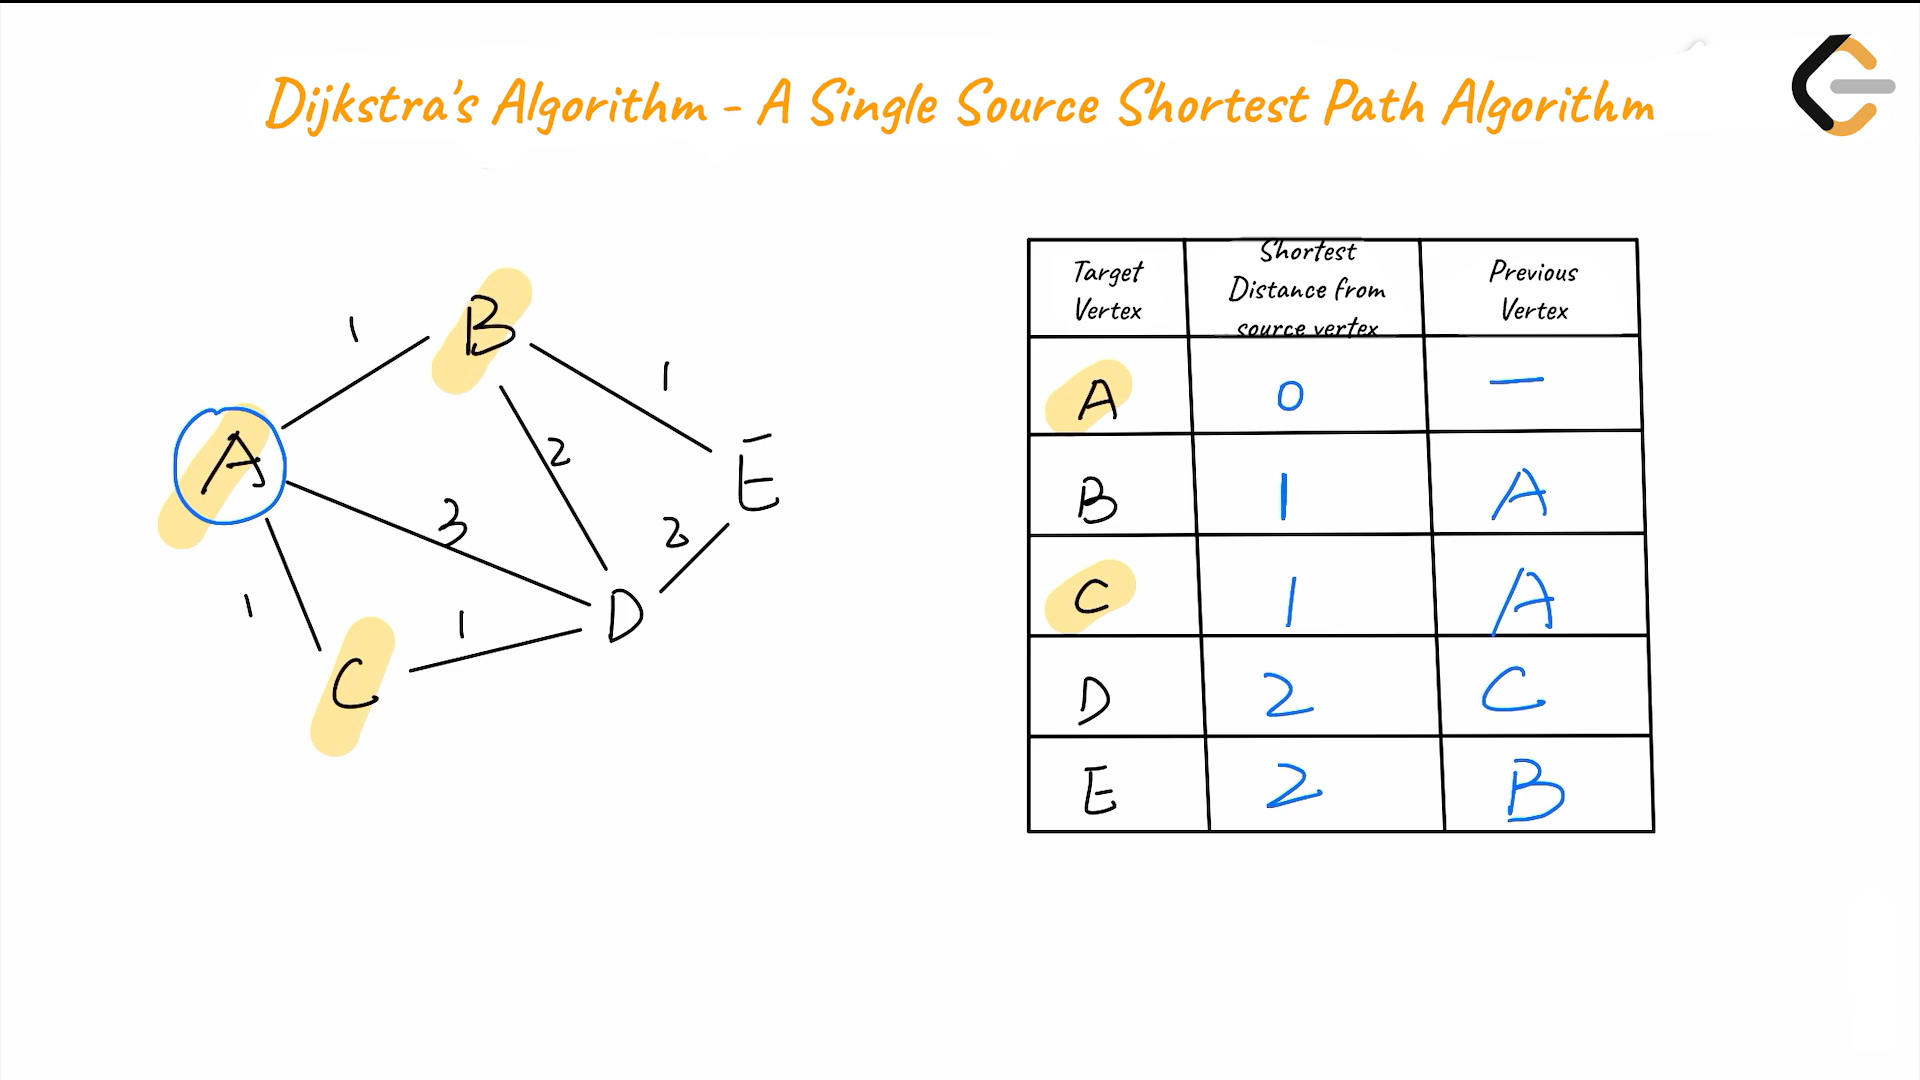
  + using a table with three columns: target, shortest distance from source vertex, and previous vertex
  * round 1, check vertex A, the source vertex, by checking all its edges (AB, AC, AD)
    + for vertex A, the distance is 0, and previous vertex is None
    + for vertex B, edge AB is 1, its distance is 1, previous vertex is A
    + for vertex C, edge AC is 1, its distance is 1, previous vertex is A
    + for vertex D, edge AD is 3, its distance is 3, previous vertex is A
    + for vertex E, no edge from A to E, its distance is infinite, previous vertex is None
    + since all edges from A are traversed, mark Vertex A as visited
  * round 2, from the remaining unvisited vertices, select one with the shortest distance, we select B
    + traverse all edges from vertex B (AB, BD, BE)
    + skip edge AB, since A has been visited
    + for vertex D, BD is 2, and AB is 1, so BD+AB < current distance, skip
    + for vertext E, BE=1, dist(B) = 1, so dist(D) = 2 < infinite, so update dist(D)=2, previous vertex is B
    + mark vertex B as visited
  * round 3, select vertex C, since it has the shortest distance of 1, and traverse all its edges, AC, CD
    + skip vertex A, since it has been visited
    + for vertex D, dist(C)+ edge CD (1) = 2 < current dist, which is 3, update dist(D) = 2, previous vertex is C
    + mark vertex C as visited
  * from remaining unvisited vertices, D and E, we randomly select D, which has AD, CD and DE
    * skip vertices A and C since they are visited
    * for vertex D, DE is 2, dist(D)=2, so dist(D) + DE = 4 > current distance for D, so skip
    * mark vertex D as visited
  * finish vertex E, since all its neighbors are visited
  * we can easily construct the paths from source vertex to other vertices by tracing the previous vertex column
* in general, we take the starting vertex as the center and gradually expand outward while updating the shortest path to reach other vertices
* limitations
  + dijkstra algorithm only works for graphs where all the weights are positive. This is because in each round when we choose the vertex with shortest path, we know it must be the shortest path for that vertex, since paths from other vertices are already at least equal to this path, and any other path from these vertices to this vertex must add extra vertices, which is sure to be longer due to the positive weights of all the edges. However, if the edge weights can be negative, this will not be valid
* Time complexity
  + O(V + ElogV) for binary heap
    + add each vertex to set O(V)
    + in worst case, need to insert all edges to heap, and each time heappop is log(E) = log(V), the same for heappop
* space complexity:
  + O(V) to store V vertices
  + depends on the structure of heap, if can not delete items, will consume an extra O(E) space for heap, otherwise, will only need to store edges of unvisited vertices
    

####  Leetcode 743 Network Delay Time  
* Overview
  + You are given a network of n nodes, labeled from 1 to n. You are also given times, a list of travel times as directed edges `times[i] = (ui, vi, wi)`, where ui is the source node, vi is the target node, and wi is the time it takes for a signal to travel from source to target.
  + We will send a signal from a given node k. Return the minimum time it takes for all the n nodes to receive the signal. If it is impossible for all the n nodes to receive the signal, return -1.
 
* use defaultdict(list) to store the adj_list
  + since it is a directed graph, we only store the entry using the start vertices as key, and append(weight, end_vertex)
* use a list of time_delays to store the shortest distance results for each vertex (remember to offset the index by one)
  + all the vertices have a value of infinite, excep the starting vertex, which has a value of zero
* use d_table to simulate the Dijkstra table to store the intermediate distance results during the process
  + initialize d_table by heappush((0, starting_vertex))
  + we use the heappush and heappop operations on this d_table to pop the shortest distance results for each round
  + if the heappopped distance of a vertex is bigger than the corresponding distance stored in time_delays table, we skip
  + if the heappopped distance equals to the corresponding value in time_delays, this is an updated shortest distance
    + then we find all its neighbouring vertices from the adj_list, and calculate the distances for these vertices, and if they are shorter than the values in time_delays, then 
      + update the time_delays value
      + add the corresponding neighbouring vertices, and their updated shortest distances to heap
* when d_table is empty, check the time_delays table
  + if any of the vertices has distance of infinite, returns -1 (this vertex is not reachable)
  + find the max of the time_delays table and returns
* time complexity
  + O(Elog(V))
  + ignore the time_delays upates which is O(E)
  + assume O(log(E)) = O(log(V))
* space complexity:
  + O(E+V)
  + O(E) for adj_list
  + O(E) for d_table
  + O(V) for time_delays
* other thoughts:
  + the time delay table records the shortest distance between each vertex to starting vertex
  + we update time delay table for a vetex when we have the final answer of the shortest distance of one of its previous vertex along a path. If this path is shorter than the current shortest path in time delay table
  + when a path is popped from the heap and its value equals to the delay table's record, this is the shortest path for this vertex
    + another implementation is to check if the corresponding vertex popped has been visited, if not, add this to visited set, otherwise , ignore it
      + this is based on the fact that a path may be popped since it is the shortest among all the remaining unvisited vertices, but the shortest path for a vertex must be popped at the first one for that vertex. It is easy to understand if we think about two paths to vertex C, one is 100, the other is 200, due to the property of heap, the 100 one will always be popped before the 200 one.
      + the 200 path of Vertex C may be popped later, but this is relative to other remaining unvisited vertices, but not the shortest one for vertex C

In [5]:
from heapq import heappop, heappush
from typing import List
class Solution:
    def networkDelayTime(self, times: List[List[int]], n: int, k: int) -> int:
                        
        edges = defaultdict(list)
        for start, end, dist in times:
            edges[start-1].append((dist, end-1))
            
        # can use list for adj_list
        # adj_list = [[] for _ in range(n)]
        # adj_list[start-1].append((dist, end-1))
            
        # final results of distance of n nodes to node k
        time_delays = [float("inf")] * n
        time_delays[k-1] = 0
        
        # table used to simulate Dijkstra table
        d_table = []
        
        heappush(d_table, (0, k-1))        
        
        while d_table:
            dist, vertex = heappop(d_table)
            
            if dist == time_delays[vertex]:    
            
                for (d, ng) in edges[vertex]:
                    if dist + d < time_delays[ng]:
                        time_delays[ng] = dist + d
                        heappush(d_table, (dist+d, ng))
                    
       
        rs = 0
        for i in range(len(time_delays)):
            if time_delays[i] == float("inf"):
                return -1
            rs = max(rs, time_delays[i])
        return rs     
    

#### Bellman Ford Algorithm
* Theorem 1: In a “graph with no negative-weight cycles” with N vertices, the shortest path between any two vertices has at most N-1 edges.
  + this applies to DAGs (directed, acyclic graphs) and no negative-weight cyclic graphs
* for cyclic graphs, we can classify them into two types: positive-weight cycle and negative-weight cycle
  + positive-weight cycle: sum of the weights of the cycle is positive
  + negative-weight cycle: sum of the weights of the cycle is negative
* Theorem 2: In a “graph with negative weight cycles”, there is no shortest path
  + intuitively, the more cycles you traverse, the total weights of the path is smaller, and there is no shortest path
* DP algorithm to find the shortest path
  + the basic idea is to find the shortest path using at most 1 edge, 2 edges, ... and N-1 edges
    + note that at most N-1 edges includes 1, 2, ... N-2, N-1 edges
  +   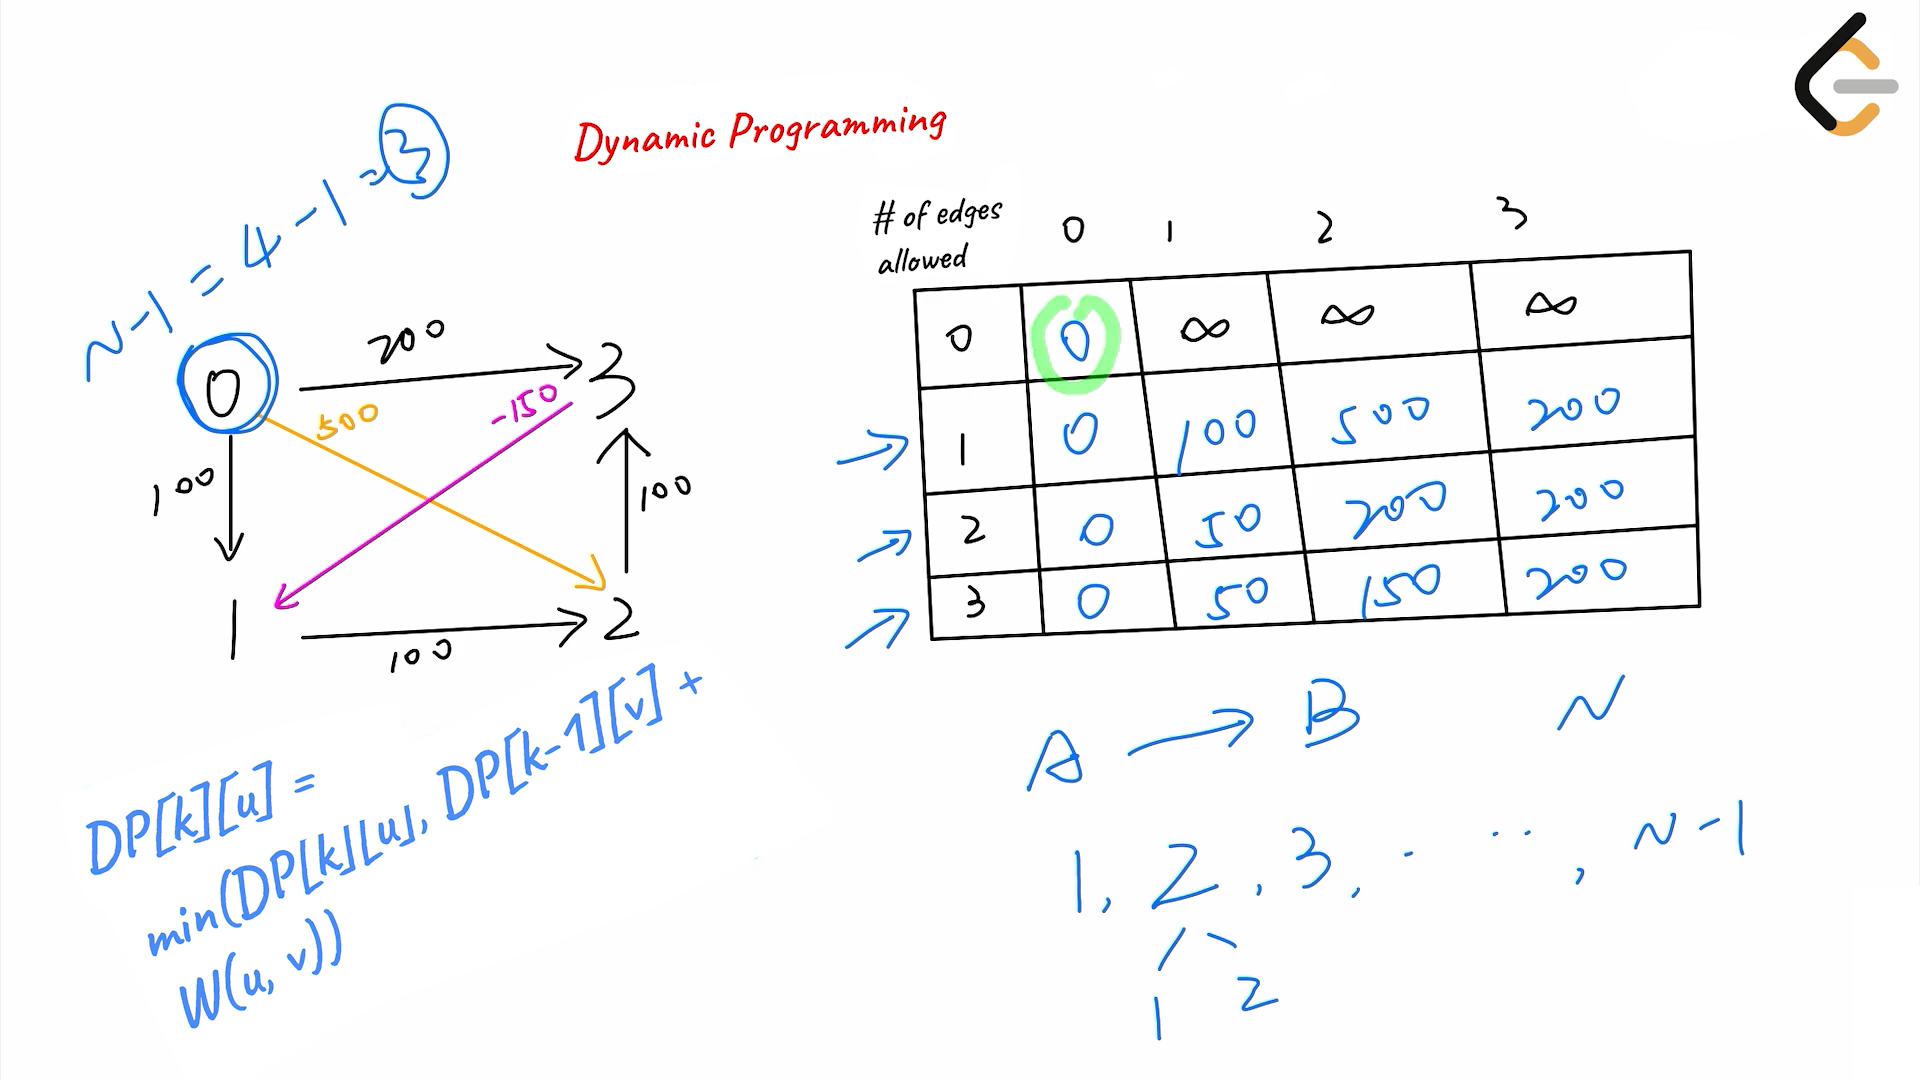

   + we first set up a table with N-1 rows and N columns
     + each row refers to how many edges are at most used
     + each column means the shortest path from the starting vertex to the corresponding vertex of that column
   + starting from the starting vertex, we assign 0 to all its rows since it takes no costs to itself
   + from the first row, for each vertex column, we find all the edges that end at this column, and update the value using the transition equation
     + the equation says: update the value of column u by the min of the current value at row k, column u, and all the values of row k-1, column v plus weight of the edge from v to u, where v refers to vertices having edges to vertex u
   + the algorithm executes row by row, and in each cell (k, u), find all the edges (v, u) that end at u, add the edge weight w(v, u) to the cell value of (k-1, v), and update the cell (k, u) by the min value of these values plus (k, u) value
* time complexity
  + O(VE)
    + for each cell, we traverse all the edges ending at that column vertex, therefore, we traverse all the edges when completing each row
    + since we have V-1 rows, the total computation will be O(VE)
    + note that this is not the total number of cells in the table, which is N(N-1). This is much bigger than that because each cell may need to check multiple edges
* space complexity
  + O(V^2)  
  
* Bellman-Ford algorithm is a typical space optimized DP algorithm since we only need two rows when traversing rows, the previous one and the current one
  + we initialize two list, previous, and current
  + the current list has all the values as infinite, except for the starting vertex, this corresponds to row 0
  + when calculate row 1, we first copy the current list to the previous list, and then update elements in current list using dynamic transition equation. 
  + this process repeats: copy the current list to previous list, and update current list using values of previous list and edge weights
  + note that in Python arrays are assigned by reference, so we have to copy the current list to previous list element-wise, rather than directly assigning list
* time complexity
  + O(VE)
    + we will have in the worst case N-1 times, so O(VE)   
* space complexity
  + O(V)  
  + only need to store previous and current list after space optimization
* limitations
  + the number of rounds depends on the order of the edges traversed
  + we improve the algorithm to address this limitation in the Shortest Path Faster Algorithm (SPFA algorithm)

#### SPFA algorithm
* time complexity
  + O(VE) we iterate through all vertices, and in each iteration, we may traverse all the edges if each vertex is connected to all the others in worst case
  + O(V) we need to store V vertices


#### Leetcode 787 Cheapest Flights Within k Stops
* Overview
  + There are n cities connected by some number of flights. You are given an array flights where `flights[i] = [fromi, toi, pricei]` indicates that there is a flight from city fromi to city toi with cost pricei.
  + You are also given three integers src, dst, and k, return the cheapest price from src to dst with at most k stops. If there is no such route, return -1.
* find the shortest path with k number of intermediate stops. Therefore, k stops means k+1 edges. If k==0, 1 edge
  + we use a for loop (for _ in range(k+1)) that will loop k+1 times
* it is straightforward to use bellman-ford algorithm
* algorithm 1
  + implement adj_list
  + initialize pre and curr list, with all element set as inf, except src, which is 0
  + use a for loop to have k+1 iterations (0 to k+1)
  + each time start from src, and with an idex from 0 to n mod by n 
  + check the value of curr or pre, should be the same. if the pre\[dst\] is inf, return -1 otherwise return its value
* algorithm 2
  + realizing that all the edges will have to be traversed, there is no need to use adj_list. In each iteration, we just iterate all the flights, and if the previous list with the starting city has a finite price, we update the tranistion equation
  + after k+1 iterations, return -1 if pre\[dst\] is inf, otherwise return its value

In [4]:
from typing import List
class Solution:
    def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, k: int) -> int:
        if not flights:
            return 0 if src==dst else -1
        
        pre = [float("inf")] * n
        curr = [float("inf")] * n 
        pre[src] = 0
                     
        for _ in range(k+1):
            for start, end, price in flights:
                if pre[start] < float("inf"):
                    curr[end] = min(curr[end], pre[start] + price)
            pre = curr.copy()
        return -1 if pre[dst] == float("inf") else pre[dst]    

#### Leetcode 1631: Path with minimum effort
* Overview
  + You are a hiker preparing for an upcoming hike. You are given heights, a 2D array of size rows x columns, where `heights[row][col]` represents the height of cell (row, col). You are situated in the top-left cell, (0, 0), and you hope to travel to the bottom-right cell, (rows-1, columns-1) (i.e., 0-indexed). You can move up, down, left, or right, and you wish to find a route that requires the minimum effort.
  + A route's effort is the maximum absolute difference in heights between two consecutive cells of the route.
  + Return the minimum effort required to travel from the top-left cell to the bottom-right cell.
  
* This is basically a Dijkstra's algorithm. The basic idea is that since the max of the absolute differences are the weight, we only have non-negative weights, which can be solved by Dijkstra's algorithm
* the basic logic is that, for each cell (i, j), there are different ways to access this cell, and therefore, will have differnt max weight, and we need to find the min of the max of them along a path
* we take advantage of heap and use a table to record the min of the path from (0, 0) to each (i, j) cell
* note that all the edge information is in heights matrix, and we can get the edge weights by max of the difference between their heights
* a tricky part is that if we know the shortest path/cost for (i, j), and one of its neighbors (x, y) has smaller costs from their height difference, then the cost of (x, y) = cost of (i, j), since the cost of a path is decided by the max cost along the path 
* others are just details adjustment to the Dijkstra' algorithm template
* Time complexity:
  + O(mnlog(mn)
    + we may traverse each cell and push/pop the cell distance to heap. Therefore the heap can store up to mn elements, so we have mn push/pop operation, each operation takes log(mn)
* Space complexity
  + O(mn) to store `max_matrix` and min heap

In [2]:
from typing import List
from heapq import heappop, heappush
class Solution:
    def minimumEffortPath(self, heights: List[List[int]]) -> int:
        
        m = len(heights)
        n = len(heights[0])
        
        moves = [[0, 1], [0, -1], [1, 0], [-1, 0]]
        
        max_matrix = [[float("inf")] * n for _ in range(m)]
        max_matrix[0][0] = 0
        heap = []
        
        # push (i, j, cost) to heap
        heappush(heap, (0, 0, 0))
        
        while heap:
            cost, i, j = heappop(heap)
            
            if i == m-1 and j == n-1:
                return cost
            
            if cost > max_matrix[i][j]:
                continue
                
            # now the cost is the shortest path (final answer) for (i, j)
            # we then explore its neighbours
            for move in moves:
                x = i + move[0]
                y = j + move[1]
                if -1< x < m and -1 < y < n:                    
                    max_cost = max(abs(heights[i][j] - heights[x][y]), cost)
                    # there are different ways to (x, y), and we use the path with min cost
                    if max_cost < max_matrix[x][y]:
                        heappush(heap, (max_cost, x, y))
                        max_matrix[x][y] = max_cost
            
        return max_matrix[m-1][n-1]                 